BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 11.1 Applying the Bootstrap

In [2]:
births = Table.read_table('../../data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [3]:
babies = births.select('Birth Weight', 'Gestational Days')
babies

Birth Weight,Gestational Days
120,284
113,282
128,279
108,282
136,286
138,244
132,245
120,289
143,299
140,351


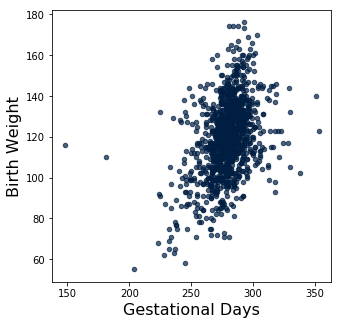

In [4]:
babies.scatter(1, 0)

In [5]:
ratios = babies.with_column(
    'Ratio BW/GD', babies.column(0)/babies.column(1)
)
ratios

Birth Weight,Gestational Days,Ratio BW/GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


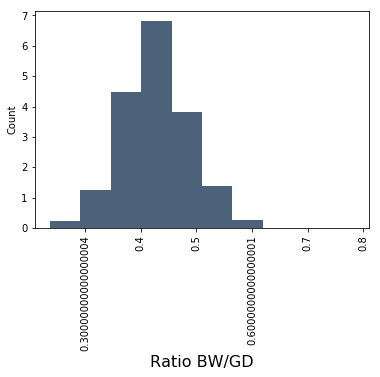

In [7]:
ratios.hist('Ratio BW/GD', normed=None, density=True)

In [8]:
np.median(ratios.column('Ratio BW/GD'))

0.42907801418439717

[0.4244604316546763, 0.43333333333333335]


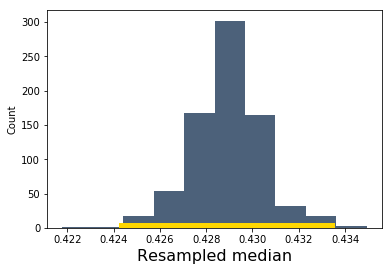

In [11]:
resampled_medians = []
for i in np.arange(1000):
    resample = ratios.sample()
    median = np.median(resample.column('Ratio BW/GD'))
    resampled_medians.append(median)
    
interval_99 = [percentile(0.5, resampled_medians),
               percentile(99.5, resampled_medians)]
print(interval_99)

Table().with_column('Resampled median', resampled_medians).hist(
    0, normed=None, density=True)
plt.plot(interval_99, [0, 0], color='gold', lw=10);

Lec 11.2 Confidence Interval Pitfalls

Do not try to estimate very high/low percentiles, min, max - rare elements affect them

The probability distribution of the statistic should be (roughly) bell shaped

Sample should not be small